# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [2]:
# Download the file using wget
!wget http://bit.ly/udacity-annoations-crowdai -O annotations.tar.gz



--2024-05-10 16:34:39--  http://bit.ly/udacity-annoations-crowdai
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.amazonaws.com/udacity-sdc/annotations/object-detection-crowdai.tar.gz [following]
--2024-05-10 16:34:40--  https://s3.amazonaws.com/udacity-sdc/annotations/object-detection-crowdai.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.74.88, 16.182.41.192, 3.5.30.229, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.74.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1650810880 (1.5G) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]   1.54G  33.0MB/s    in 50s     

2024-05-10 16:35:30 (31.4 MB/s) - ‘annotations.tar.gz’ saved [1650810880/1650810880]



In [3]:
!tar -xf annotations.tar.gz


In [4]:
!wget https://github.com/udacity/self-driving-car/blob/master/annotations/labels_crowdai.csv

--2024-05-10 16:35:58--  https://github.com/udacity/self-driving-car/blob/master/annotations/labels_crowdai.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘labels_crowdai.csv’

labels_crowdai.csv      [ <=>                ] 258.55K  --.-KB/s    in 0.03s   

2024-05-10 16:35:58 (8.71 MB/s) - ‘labels_crowdai.csv’ saved [264755]



In [9]:
!wget -O labels_crowdai.csv https://github.com/udacity/self-driving-car/raw/master/annotations/labels_crowdai.csv


--2024-05-10 16:42:59--  https://github.com/udacity/self-driving-car/raw/master/annotations/labels_crowdai.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udacity/self-driving-car/master/annotations/labels_crowdai.csv [following]
--2024-05-10 16:42:59--  https://raw.githubusercontent.com/udacity/self-driving-car/master/annotations/labels_crowdai.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7156250 (6.8M) [text/plain]
Saving to: ‘labels_crowdai.csv’

labels_crowdai.csv  100%[===================>]   6.82M  --.-KB/s    in 0.04s   

2024-05-10 16:43:01 (168 MB/s) - ‘labels_crowdai.csv’ sa

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [10]:
!file labels_crowdai.csv


labels_crowdai.csv: CSV text


In [11]:
df = pd.read_csv('/content/labels_crowdai.csv')
df = shuffle(df)
df.head()

,xmin,ymin,xmax,ymax,Frame,Label,Preview URL
7858,331,458,399,479,1479499305027493005.jpg,Car,http://crowdai.com/images/x3zHSyZ-DHtf-kXu/vis...
13919,929,557,996,622,1479499978074026667.jpg,Car,http://crowdai.com/images/UDUkNrJzP4fpN5Tk/vis...
7544,587,568,646,613,1479499240523241002.jpg,Car,http://crowdai.com/images/m6LqSOBIomJf6g5d/vis...
31818,327,572,390,628,1479502500244448242.jpg,Car,http://crowdai.com/images/EEgFlWq8NQtRnduZ/vis...
35060,373,516,641,706,1479502768262137934.jpg,Car,http://crowdai.com/images/ypjbNQd4FTJJo2Of/vis...


<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">
    
 * This dataset is mostly a practice and training aspect for the subject of YOLO. The data is labeled with 5 classes.
 * classic_id labels: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'

In [12]:
classes = df.Label.unique()
print(classes)

['Car' 'Pedestrian' 'Truck']


In [13]:
labels = { :'Car', 2:'Truck', 3:'Pedestrian'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [18]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '/content/object-detection-crowdai/'

for class_id in classes:
    first_row = df[df['Label'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['Frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

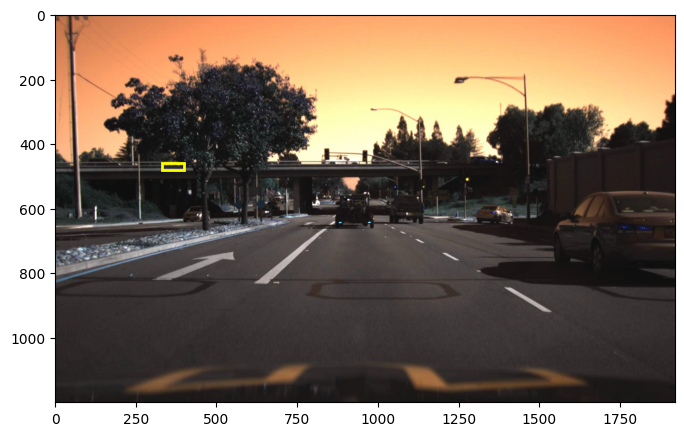

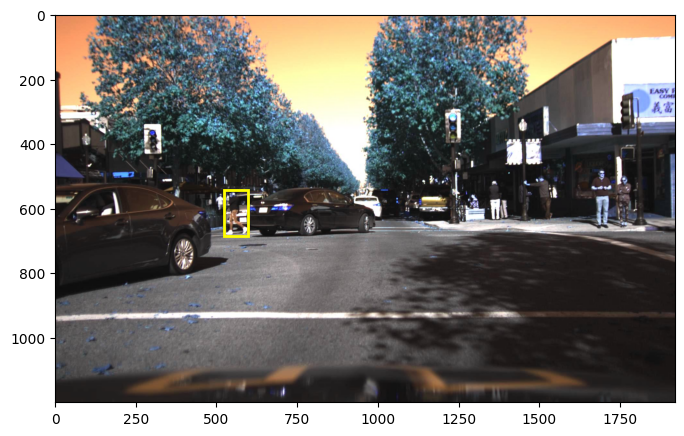

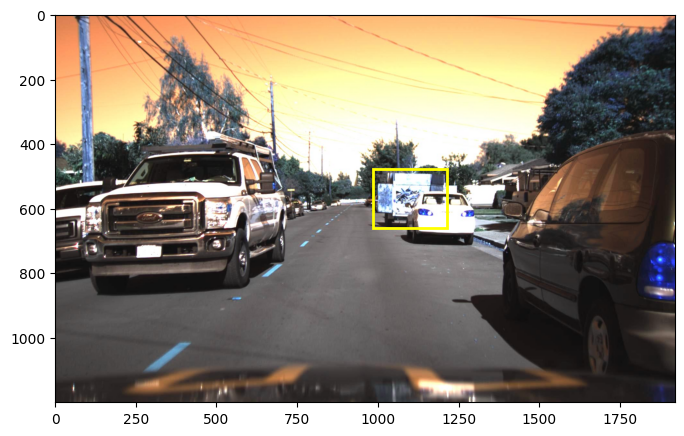

In [22]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    #plt.title("Label " + classes[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()

In [20]:
print(labels.keys())


dict_keys([1, 2, 3])


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [23]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 10.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [24]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [25]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 245MB/s]


In [26]:
results=model.predict(source="/content/object-detection-crowdai/1479498371963069978.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/object-detection-crowdai/1479498371963069978.jpg: 416x640 7 cars, 4 trucks, 1 stop sign, 156.9ms
Speed: 23.2ms preprocess, 156.9ms inference, 3750.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [27]:
result = results[0]
box = result.boxes[0]

In [28]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [29]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [1722.4830322265625, 485.93927001953125, 1919.332763671875, 648.7288208007812]
Probability: 0.8294604420661926


In [30]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [1722, 486, 1919, 649]
Probability: 0.83
---
Object type: stop sign
Coordinates: [1697, 352, 1755, 430]
Probability: 0.74
---
Object type: car
Coordinates: [782, 536, 906, 644]
Probability: 0.67
---
Object type: truck
Coordinates: [549, 520, 626, 603]
Probability: 0.67
---
Object type: truck
Coordinates: [456, 522, 552, 617]
Probability: 0.64
---
Object type: car
Coordinates: [273, 546, 383, 649]
Probability: 0.63
---
Object type: car
Coordinates: [760, 560, 803, 617]
Probability: 0.58
---
Object type: car
Coordinates: [95, 546, 288, 682]
Probability: 0.57
---
Object type: truck
Coordinates: [95, 546, 288, 682]
Probability: 0.54
---
Object type: truck
Coordinates: [273, 545, 384, 650]
Probability: 0.51
---
Object type: car
Coordinates: [655, 570, 680, 591]
Probability: 0.3
---
Object type: car
Coordinates: [688, 565, 714, 591]
Probability: 0.2
---


In [31]:
results1 = model.predict(source="/content/object-detection-crowdai/1479498376463086347.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /content/object-detection-crowdai/1479498376463086347.jpg: 416x640 1 car, 1 truck, 1 stop sign, 27.7ms
Speed: 3.4ms preprocess, 27.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


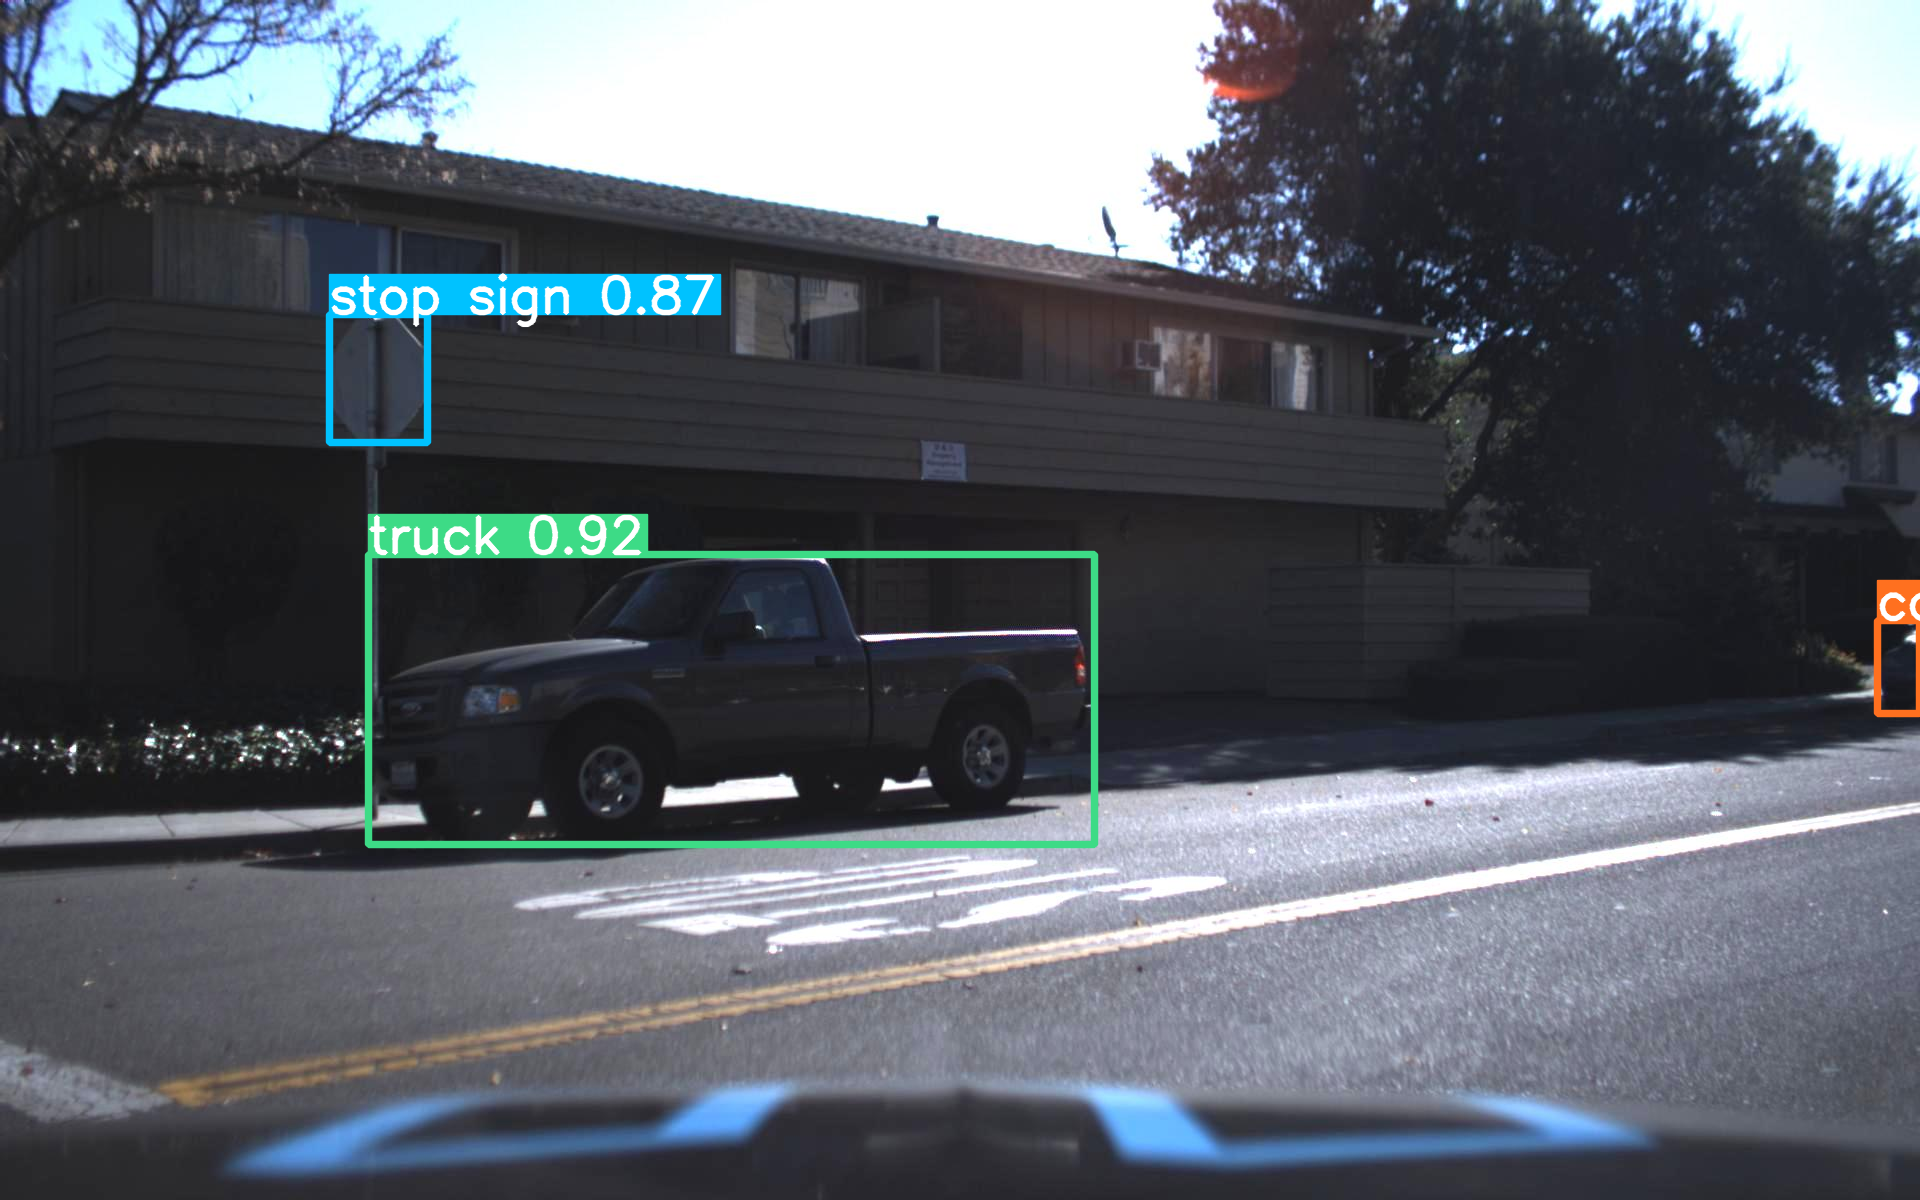

In [32]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))